# **EDA & Survival Prediction**

### **Import Libraries**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

### **Import Dataset**

In [120]:
df = pd.read_csv('data.csv')

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Data Cleaning**


### **Handling Nulls**

In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Fill Null in "Age" Using Imputer**

In [125]:
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fill null values in the 'Age' column
df['Age'] = imputer.fit_transform(df[['Age']])

### **Fill Null with most Frequent in Embarked**

In [126]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [127]:
#drop the cabin column
df.drop(columns=['Cabin'], inplace=True)

In [128]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **Data Visualization**
### **Age Distribution Plot**

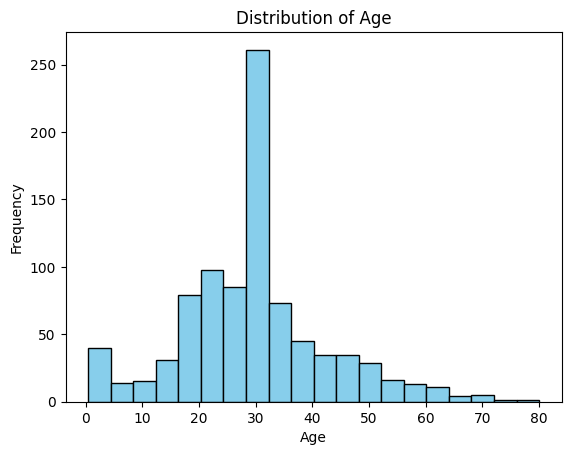

In [129]:
# Create a histogram
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

### **Number of Male and Female Passengers**

C:\Users\Dell\AppData\Local\Temp\ipykernel_3604\50495121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


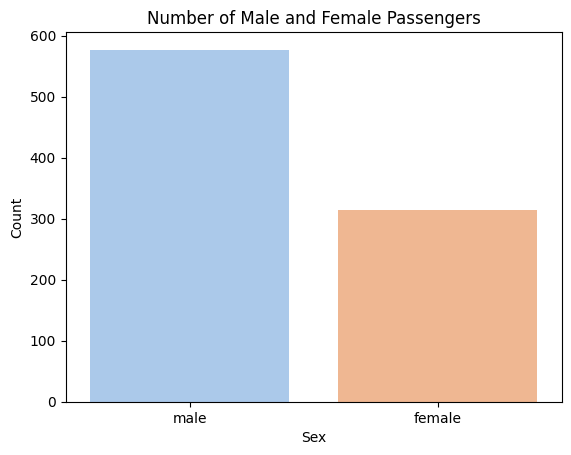

In [130]:
sns.countplot(data=df, x='Sex', palette='pastel')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers')

# Show the plot
plt.show()

### **Survivors by Gender**

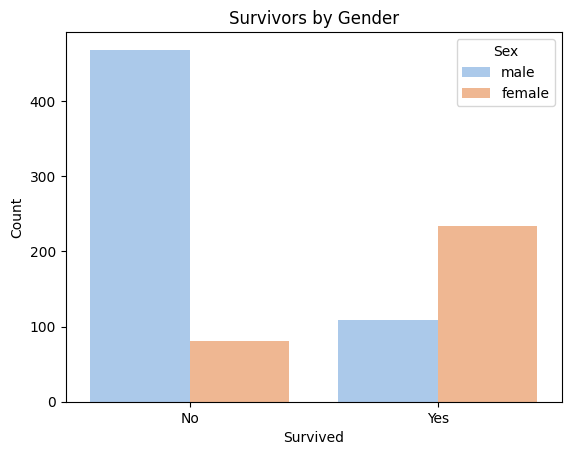

In [131]:
# Create a count plot
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')

# Replace x-axis labels 0 and 1 with 'No' and 'Yes'
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Gender')

# Show the plot
plt.show()

### **Survivors by Pclass**

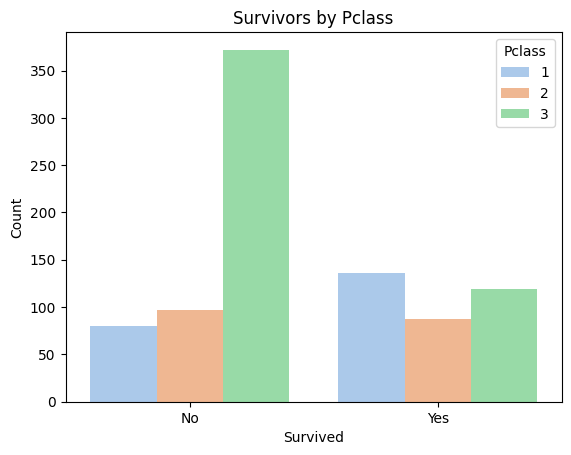

In [132]:
# Create a count plot
sns.countplot(data=df, x='Survived', hue='Pclass', palette='pastel')

# Replace x-axis labels 0 and 1 with 'No' and 'Yes'
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Pclass')

# Show the plot
plt.show()

### **Survivors by Age Class**

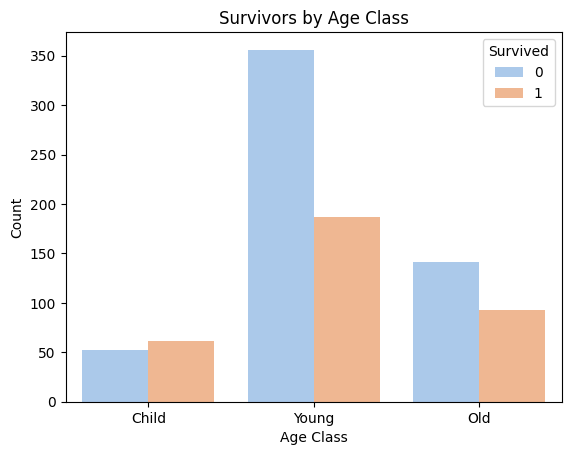

In [133]:
# Define age ranges for each class
age_bins = [0, 18, 35, df['Age'].max()]
age_labels = ['Child', 'Young', 'Old']

# Categorize ages into classes
df['Age_Class'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a bar plot
sns.countplot(data=df, x='Age_Class', hue='Survived', palette='pastel')

# Add labels and title
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.title('Survivors by Age Class')

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3604\3772719101.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["Pclass"]).plot.bar()


<Axes: xlabel='Pclass'>

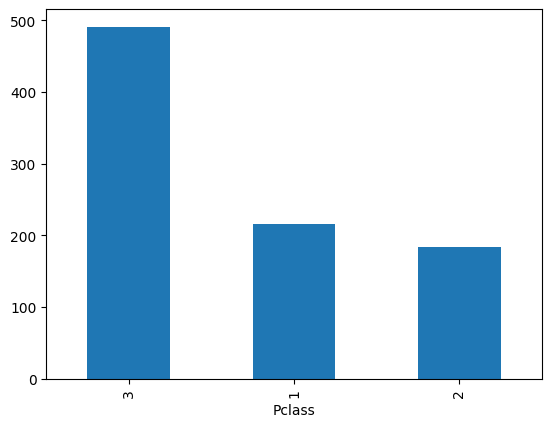

In [134]:
pd.value_counts(df["Pclass"]).plot.bar()

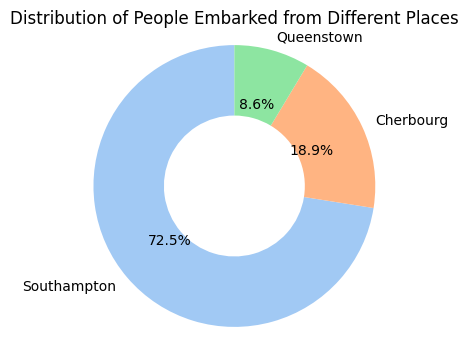

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the "Embarked" column

# Calculate the value counts for 'Embarked' column
embarked_counts = df['Embarked'].value_counts()

# Data for the donut chart
labels = ['Southampton', 'Cherbourg', 'Queenstown']  # City names
sizes = embarked_counts.values.tolist()

# Create a color palette
colors = sns.color_palette('pastel')

# Create a donut chart with Seaborn
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle in the middle to turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Distribution of People Embarked from Different Places')
plt.show()


In [136]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_Class'],
      dtype='object')

In [137]:
#Remove unnecessary column from the dataset
df.drop(columns=['PassengerId','Name','Parch','Ticket', 'Embarked'],inplace=True)

In [138]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Age_Class'], dtype='object')

### **Build Model**

In [139]:
X = df.drop((['Survived']) , axis = 1)
y = df['Survived']

### **train/test/split**

In [140]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)


### **Fitting Model**

In [141]:
model= RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'male'

In [117]:
model = GridSearchCV(model,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=1)
model.fit(X_train,y_train)
print("Best Parameters: ", model.best_params_)
Best_RandomForest_Model = model.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


ValueError: 
All the 3240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'female'

--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\miniconda3\envs\pandas_env\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'male'


### **Accuracy on Training Set**

In [106]:
print("Accuracy on Training Set: {:.2f}".format(model.best_score_ * 100))

NameError: name 'model' is not defined